# Import module, packages

In [3]:
!pip install iPython_SQL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

import csv, sqlite3

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")


# 1. Business Understanding and Analytic Approach

•	Mục tiêu: Phân tích giá bất động sản tại các thành phố lớn như New York, Los Angeles, và Chicago. Mục tiêu là so sánh sự khác biệt về giá giữa các khu vực này và phân tích các yếu tố ảnh hưởng đến giá.  
•	Tiếp cận: Tập trung thu thập dữ liệu từ các trang bất động sản và thực hiện phân tích so sánh giá giữa các loại hình bất động sản trong thành phố  



# 2. Data Collection, Understanding, Preparation

### Dataset: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

In [2]:
big_cities = {
    "Illinois": "Chicago",
    "New York": "New York",
    "California": "Los Angeles"
}

outskirts = {
    "California": "Santa Monica",
    "Connecticut": "Stamford",
    "Virginia": "McLean"
}

tourism_city = {
    "Nevada": "Las Vegas",
    "Florida": "Miami",
    "California": "San Francisco"
}

all = {
    "Illinois": "Chicago",
    "New York": "New York",
    "California": "Los Angeles",
    "California": "Santa Monica",
    "Connecticut": "Stamford",
    "Virginia": "McLean",
    "Nevada": "Las Vegas",
    "Florida": "Miami",
    "California": "San Francisco"
}

In [3]:
raw_df = pd.read_csv(r'C:\Users\LAILE\OneDrive\Máy tính\ADY201m\PythonProject_OnCourse\LAB\LAB3\America\DataSet\realtor-data.zip.csv')

def extract_data(df, dict):
    data_frames = []
    for key, value in dict.items():
        data = df[(df['state'] == key) & (df['city'] == value)]
        data_frames.append(data)
    return pd.concat(data_frames, ignore_index=True)

df_big_cities = extract_data(raw_df, big_cities)
df_outskirts = extract_data(raw_df, outskirts)
df_tourism_city = extract_data(raw_df, tourism_city)
df_all = extract_data(raw_df, all)

# Bài này tập trung vào bigcity
df = df_big_cities

### Data Cleaning

In [4]:
# 1.Xử lý null

In [5]:
df.isnull().sum()

brokered_by          69
status                0
price                20
bed                2757
bath               1754
acre_lot          15404
street              158
city                  0
state                 0
zip_code              2
house_size         9001
prev_sold_date     7429
dtype: int64

In [6]:
df.dropna(inplace=True, axis=0, subset=['price', 'bed', 'bath', 'house_size'])
df.reset_index(inplace=True, drop=True)

In [7]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,10387.0,for_sale,1325000.0,5.0,6.0,0.18,1461359.0,Chicago,Illinois,60646.0,5100.0,2008-12-16
1,29307.0,for_sale,374900.0,2.0,2.0,NaN,1423219.0,Chicago,Illinois,60660.0,1600.0,2016-04-14
2,959.0,for_sale,154000.0,1.0,1.0,NaN,466047.0,Chicago,Illinois,60626.0,700.0,NaN
3,92136.0,for_sale,329900.0,3.0,2.0,0.10,1299868.0,Chicago,Illinois,60630.0,967.0,NaN
4,109914.0,for_sale,164900.0,2.0,1.0,NaN,1443877.0,Chicago,Illinois,60660.0,1000.0,2013-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...
22460,92883.0,sold,1650000.0,2.0,3.0,6.02,702209.0,Los Angeles,California,90049.0,2718.0,2021-11-24
22461,60449.0,sold,1950000.0,4.0,3.0,0.30,686725.0,Los Angeles,California,90077.0,2299.0,2021-11-29
22462,93060.0,sold,1979000.0,3.0,3.0,2.31,631616.0,Los Angeles,California,90077.0,2543.0,2021-12-01
22463,22611.0,sold,749999.0,3.0,2.0,0.15,1537832.0,Los Angeles,California,91335.0,1456.0,2021-12-01


In [8]:
# 2. Thêm thông tin cho dataset

In [9]:
bins = [0, 2000000, 5000000, 10000000, 50000000, 100000000, 200000000]
labels = ['0-2M', '2M-5M', '5M-10M', '10M-50M', '50M-100M', '100M-200M']

# Chia dữ liệu 'price' vào các khoảng
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

In [10]:
df.dtypes

brokered_by        float64
status              object
price              float64
bed                float64
bath               float64
acre_lot           float64
street             float64
city                object
state               object
zip_code           float64
house_size         float64
prev_sold_date      object
price_range       category
dtype: object

# 3. Data Analysis with SQL

In [11]:
con = sqlite3.connect("HouseData.db")
cur = con.cursor()

In [12]:
#Kích Hoạt SQL Magic
%load_ext sql

In [13]:
# Cho phép SQL Magic kết nối với CSDL
%sql sqlite:///HouseData.db

In [14]:
# Import DataFrame vào cơ sở dữ liệu
df.to_sql('BigCity', con, if_exists='replace', index=False)

22465

In [15]:
%%sql
SELECT bed, AVG(price) AS average_price
FROM BigCity
GROUP BY bed;


 * sqlite:///HouseData.db
Done.


bed,average_price
1.0,596594.190430622
2.0,873706.067297737
3.0,1290752.9756170532
4.0,1936441.8624425477
5.0,3075126.4010025063
6.0,3412102.326923077
7.0,3706158.4383561644
8.0,3450744.6403162056
9.0,3670079.097345133
10.0,3385902.1555555556


In [16]:
con.close()

# 4. Data Analysis with Python

### Phân tích giá nhà tại các Chicago, Los Angeles, New York

1.	Giá trị trung bình (mean).
2.	Trung vị (median).
3.	Độ lệch chuẩn (std).
4.	Giá trị nhỏ nhất (min).
5.	Giá trị lớn nhất (max).
6.	Phân vị thứ 25% (25% quantile).
7.	Phân vị thứ 75% (75% quantile).

In [17]:
statistic = df.describe()
print("Thống kê mô tả tổng quát cho bất động sản:")
statistic

Thống kê mô tả tổng quát cho bất động sản:


,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,22407.000000,2.246500e+04,22465.000000,22465.000000,12610.000000,2.236100e+04,22465.000000,22465.000000
mean,42161.440264,1.433767e+06,3.114089,2.664500,9.036068,9.577100e+05,64503.730336,1997.298108
std,31878.352939,3.493551e+06,2.561013,2.405907,833.090182,5.290516e+05,24569.877537,1893.350247
min,90.000000,7.000000e+03,1.000000,1.000000,0.000000,6.579000e+03,10001.000000,375.000000
25%,16829.000000,3.300000e+05,2.000000,2.000000,0.090000,4.941300e+05,60612.000000,1100.000000
50%,29307.000000,6.600000e+05,3.000000,2.000000,0.130000,1.012747e+06,60640.000000,1500.000000
75%,68092.500000,1.375000e+06,4.000000,3.000000,0.180000,1.413911e+06,90022.000000,2292.000000
max,110117.000000,1.650000e+08,70.000000,74.000000,93248.000000,1.991994e+06,91607.000000,59071.000000


In [18]:
# 8. Độ biến thiên giá theo khu vực
price_variance_by_location = df.groupby('city')['price'].var()
price_variance_by_location

city
Chicago        5.139529e+11
Los Angeles    1.373678e+13
New York       4.668359e+13
Name: price, dtype: float64

In [19]:
# 9. Số lượng bất động sản theo từng khu vực
count_by_province = df['city'].value_counts()
count_by_province

city
Chicago        11874
Los Angeles     7783
New York        2808
Name: count, dtype: int64

In [20]:
# 10. Hệ số biến thiên giá (coefficient of variation)
cv = df['price'].std() / df['price'].mean()
cv

2.4366246983052973

Hệ số biến thiên 243%: Cho thấy mức độ phân tán của giá nhà lớn ở các thành phố lớn tại Mỹ

In [21]:
# 11. Độ lệch trung bình tuyệt đối (mean absolute deviation)
price_data = df['price']
mean_price = price_data.mean()
mad = (price_data - mean_price).abs().mean()

print("Mean Absolute Deviation (MAD):", mad)

Mean Absolute Deviation (MAD): 1328736.686092918


In [22]:
# 12. Độ phân tán của giá (range)
price_range = df['price'].max() - df['price'].min()
price_range

164993000.0

In [23]:
# 13. Phân tích ngoại lệ (outliers) - sử dụng IQR (Interquartile Range)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
outliers
#outliers.sort_values(by='price', inplace=True, ascending=True)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,price_range
718,16829.0,for_sale,2945000.0,4.0,5.0,NaN,356681.0,Chicago,Illinois,60610.0,5000.0,NaN,2M-5M
744,22611.0,for_sale,3650000.0,6.0,8.0,0.08,1271399.0,Chicago,Illinois,60654.0,10000.0,2014-08-19,2M-5M
746,16829.0,for_sale,3099000.0,3.0,4.0,NaN,653557.0,Chicago,Illinois,60607.0,3395.0,NaN,2M-5M
934,8735.0,for_sale,4495000.0,5.0,6.0,NaN,558301.0,Chicago,Illinois,60611.0,8000.0,2013-12-20,2M-5M
943,8735.0,for_sale,7650000.0,5.0,6.0,NaN,849608.0,Chicago,Illinois,60614.0,6400.0,NaN,5M-10M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22433,53691.0,sold,5125000.0,5.0,6.0,0.15,1615640.0,Los Angeles,California,90046.0,5366.0,2022-01-27,5M-10M
22434,26376.0,sold,4250000.0,4.0,4.0,0.98,1409335.0,Los Angeles,California,90068.0,3670.0,2022-01-27,2M-5M
22437,92883.0,sold,2995000.0,4.0,4.0,0.12,155976.0,Los Angeles,California,90049.0,3270.0,2022-01-27,2M-5M
22441,43753.0,sold,6795000.0,5.0,5.0,0.21,1340952.0,Los Angeles,California,90027.0,4878.0,2022-01-28,5M-10M


In [24]:
# 14. Phân tích tần suất xuất hiện của giá (frequency analysis)
price_frequency = df['price_range'].value_counts()
price_frequency

price_range
0-2M         19062
2M-5M         2455
5M-10M         616
10M-50M        314
50M-100M        16
100M-200M        2
Name: count, dtype: int64

In [25]:
# 15. Hệ số tương quan giữa giá và diện tích bất động sản
corr_price_area = df['price'].corr(df['house_size'])
corr_price_area

0.5689919386148315

Hệ số tương quan ~ 0.56 --> Có một mối quan hệ tương quan nhất định

In [26]:
# 16. Hệ số tương quan giữa giá và số phòng ngủ
corr_price_bedroom = df['price'].corr(df['bed'])
corr_price_bedroom

0.24657085903366047

In [27]:
# 17. Phân tích sự khác biệt giá giữa các vùng (giá trung bình giữa các vùng)
mean_price_by_location = df.groupby('city')['price'].mean()
mean_price_by_location.sort_values(ascending=False)

city
New York       4.030042e+06
Los Angeles    1.874951e+06
Chicago        5.306098e+05
Name: price, dtype: float64

In [28]:
# 18. Đánh giá mức độ phân tán giá
price_dispersion = df['price'].std() / df['price'].mean()
price_dispersion

2.4366246983052973

In [29]:
# 19. Giá trị ngoại lệ trên và dưới (dùng IQR như phần trên)
outliers_upper = df[df['price'] > (Q3 + 1.5 * IQR)]
outliers_lower = df[df['price'] < (Q1 - 1.5 * IQR)]
print(f'Outliers upper: {outliers_upper}')
print(f'Outliers lower: {outliers_lower}')

Outliers upper:        brokered_by    status      price  bed  bath  acre_lot     street  \
718        16829.0  for_sale  2945000.0  4.0   5.0       NaN   356681.0   
744        22611.0  for_sale  3650000.0  6.0   8.0      0.08  1271399.0   
746        16829.0  for_sale  3099000.0  3.0   4.0       NaN   653557.0   
934         8735.0  for_sale  4495000.0  5.0   6.0       NaN   558301.0   
943         8735.0  for_sale  7650000.0  5.0   6.0       NaN   849608.0   
...            ...       ...        ...  ...   ...       ...        ...   
22433      53691.0      sold  5125000.0  5.0   6.0      0.15  1615640.0   
22434      26376.0      sold  4250000.0  4.0   4.0      0.98  1409335.0   
22437      92883.0      sold  2995000.0  4.0   4.0      0.12   155976.0   
22441      43753.0      sold  6795000.0  5.0   5.0      0.21  1340952.0   
22447      98034.0      sold  3795000.0  3.0   3.0      0.22  1719845.0   

              city       state  zip_code  house_size prev_sold_date  \
718        C

In [30]:
# 20. Sự phân phối giá qua các phân vị
price_quantiles = df['price'].quantile([0.25, 0.5, 0.75, 1.0])
price_quantiles

0.25       330000.0
0.50       660000.0
0.75      1375000.0
1.00    165000000.0
Name: price, dtype: float64

# 5. Data Visualization

In [31]:
sns.set(style="whitegrid")
df.head(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,price_range
0,10387.0,for_sale,1325000.0,5.0,6.0,0.18,1461359.0,Chicago,Illinois,60646.0,5100.0,2008-12-16,0-2M
1,29307.0,for_sale,374900.0,2.0,2.0,NaN,1423219.0,Chicago,Illinois,60660.0,1600.0,2016-04-14,0-2M
2,959.0,for_sale,154000.0,1.0,1.0,NaN,466047.0,Chicago,Illinois,60626.0,700.0,NaN,0-2M
3,92136.0,for_sale,329900.0,3.0,2.0,0.10,1299868.0,Chicago,Illinois,60630.0,967.0,NaN,0-2M
4,109914.0,for_sale,164900.0,2.0,1.0,NaN,1443877.0,Chicago,Illinois,60660.0,1000.0,2013-04-24,0-2M


In [32]:
#1.	Bar Plot: So sánh giá trung bình giữa các thành phố lớn tại Mỹ.

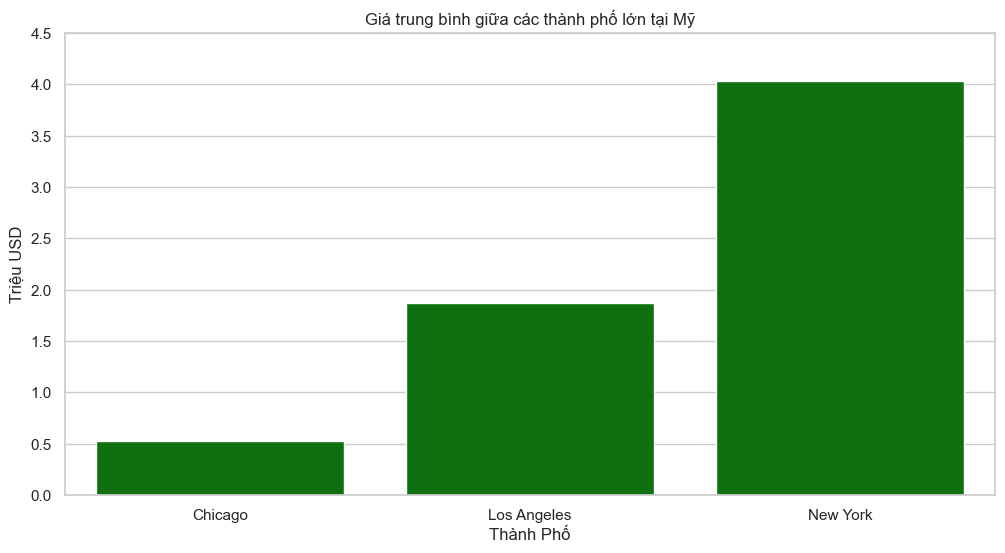

In [33]:
average_province = df.groupby('city')['price'].mean()

plt.figure(figsize=(12,6))
sns.barplot(x=average_province.index, y=average_province.values, color='Green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/((10**6)):,.1f}' for tick in yticks])

plt.title('Giá trung bình giữa các thành phố lớn tại Mỹ')
plt.xlabel('Thành Phố')
plt.ylabel('Triệu USD');

In [34]:
# 2. Box Plot: Hiển thị phân phối giá ở các vùng khác nhau.

9


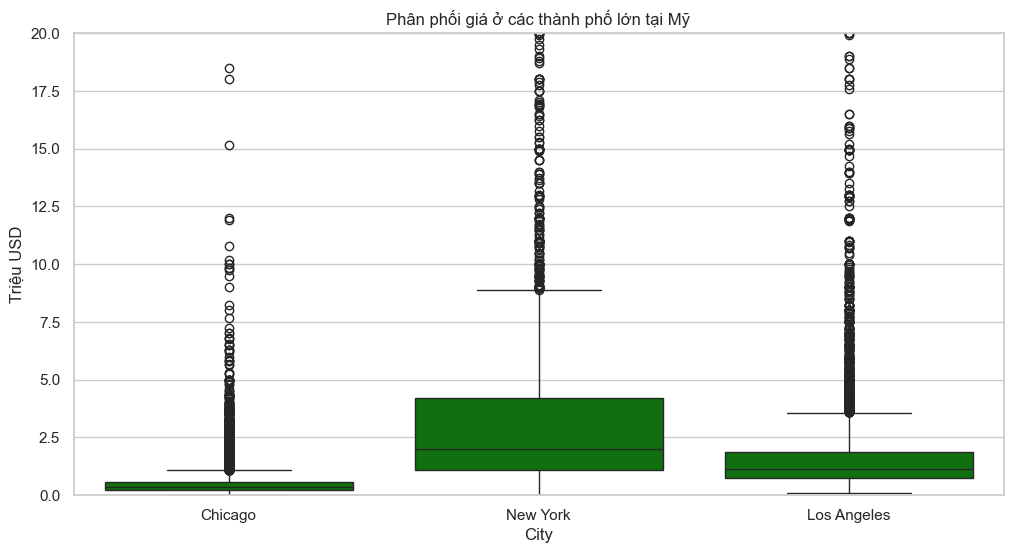

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=df, color='Green')

plt.ylim(0, 20000000)
yticks = plt.yticks()[0]
print(len(yticks))
plt.yticks(yticks, labels=[f'{float(tick)/(10**6):,.1f}' for tick in yticks])

plt.title('Phân phối giá ở các thành phố lớn tại Mỹ')
plt.xlabel('City')
plt.ylabel('Triệu USD');

In [36]:
#3. Violin Plot: Phân tích sự phân tán giá.

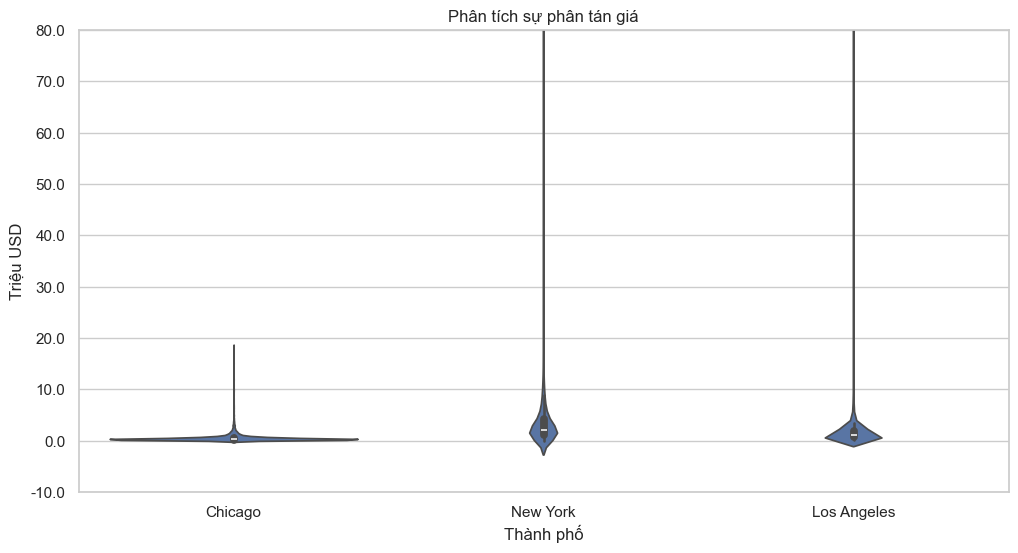

In [37]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='city', y='price', data=df)

plt.ylim(-1000000, 75000000)
yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/((10**6)):,.1f}' for tick in yticks])

plt.title('Phân tích sự phân tán giá')
plt.xlabel('Thành phố')
plt.ylabel('Triệu USD');


In [38]:
# 4.Scatter Plot: Quan hệ giữa giá và số phòng ngủ.

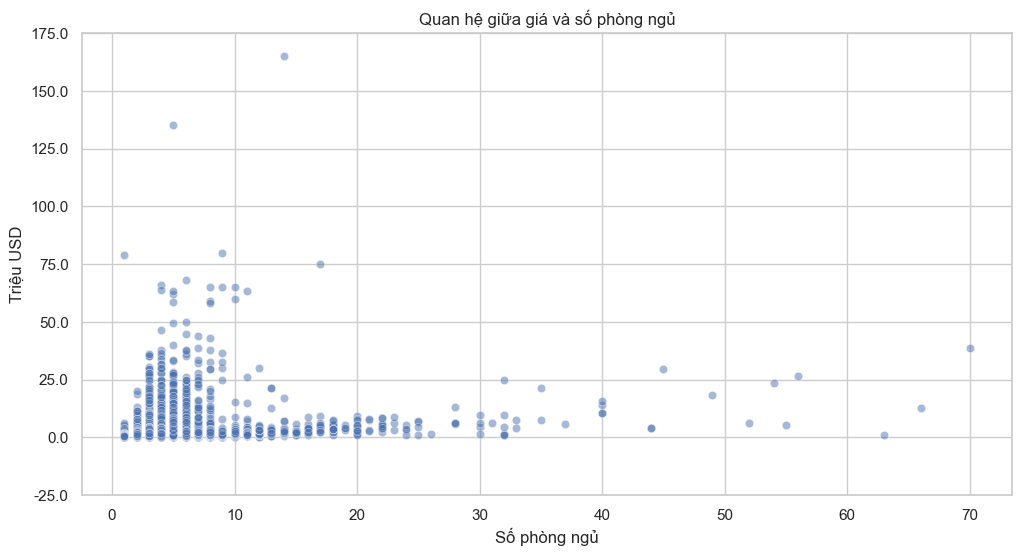

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bed', y='price', data=df, alpha=0.5)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10**6):,.1f}' for tick in yticks])

plt.title('Quan hệ giữa giá và số phòng ngủ')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Triệu USD');

In [40]:
# 6.Pie Chart: Phân bố số lượng bất động sản theo khu vực.

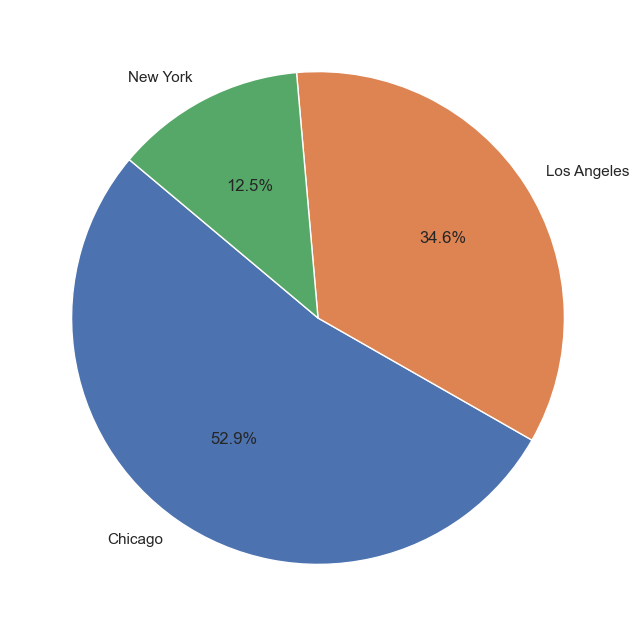

In [41]:
real_estate_counts = df['city'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(real_estate_counts, labels=real_estate_counts.index, autopct='%1.1f%%', startangle=140);

In [42]:
# Histogram: Phân phối giá của bất động sản.

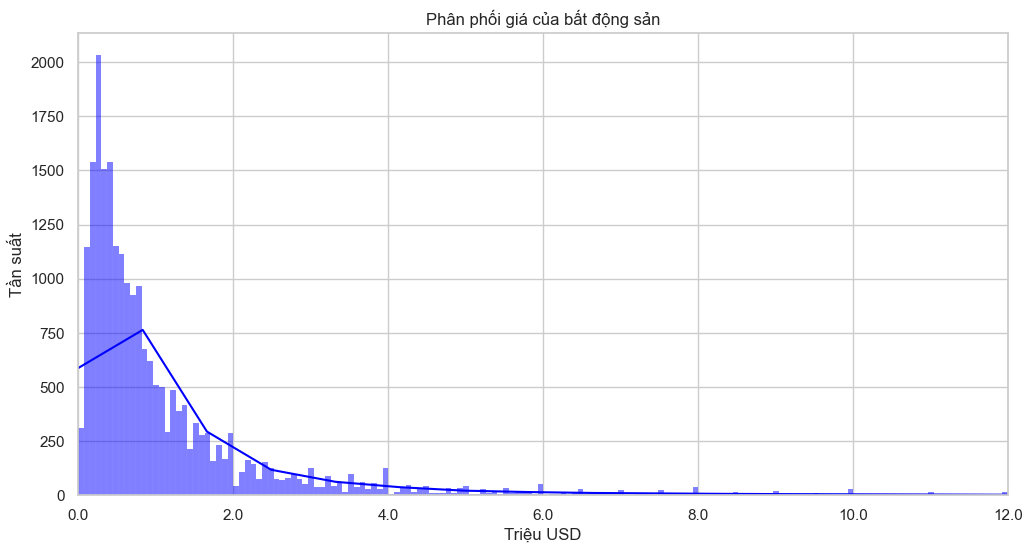

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True, color='blue')

plt.xlim(0, 12000000)
xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10**6):,.1f}' for tick in xticks])

plt.title('Phân phối giá của bất động sản')
plt.xlabel('Triệu USD')
plt.ylabel('Tần suất');

In [44]:
# Histogram: Phân phối tích lũy giá nhà

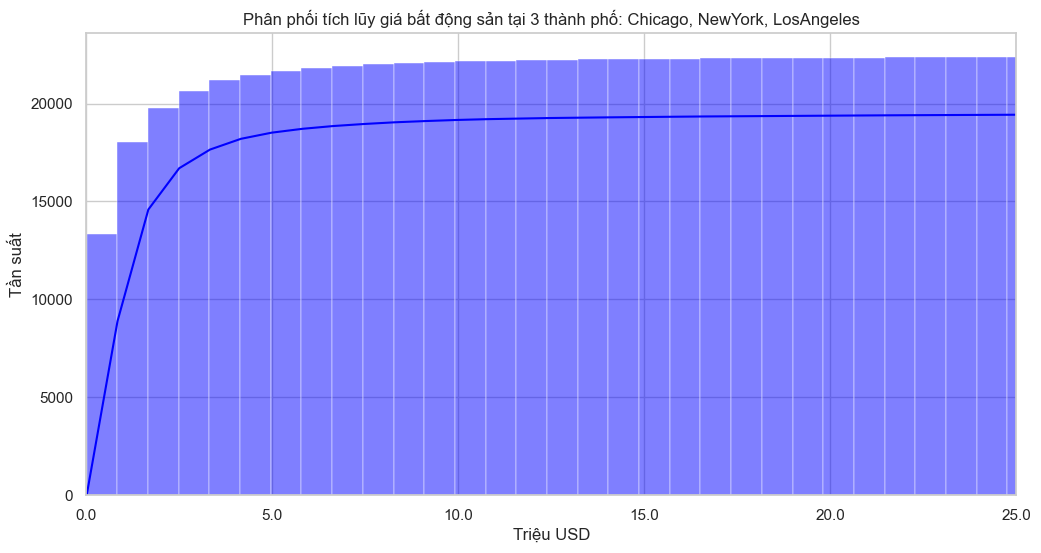

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True, color='blue', cumulative=True, bins=200)

plt.xlim(0, 25000000)
xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10**6):,.1f}' for tick in xticks])

plt.title('Phân phối tích lũy giá bất động sản tại 3 thành phố: Chicago, NewYork, LosAngeles')
plt.xlabel('Triệu USD')
plt.ylabel('Tần suất');

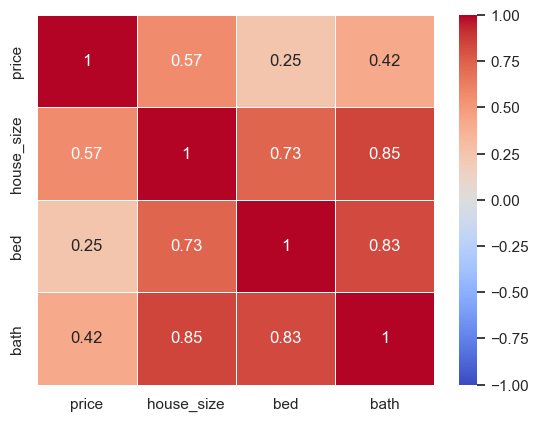

In [46]:
# Heatmap: Tương quan giữa giá và các yếu tố khác.
corr_matrix = df[['price', 'house_size', 'bed', 'bath']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5);

In [47]:
# Pair Plot: Tương quan giữa các biến số khác nhau.

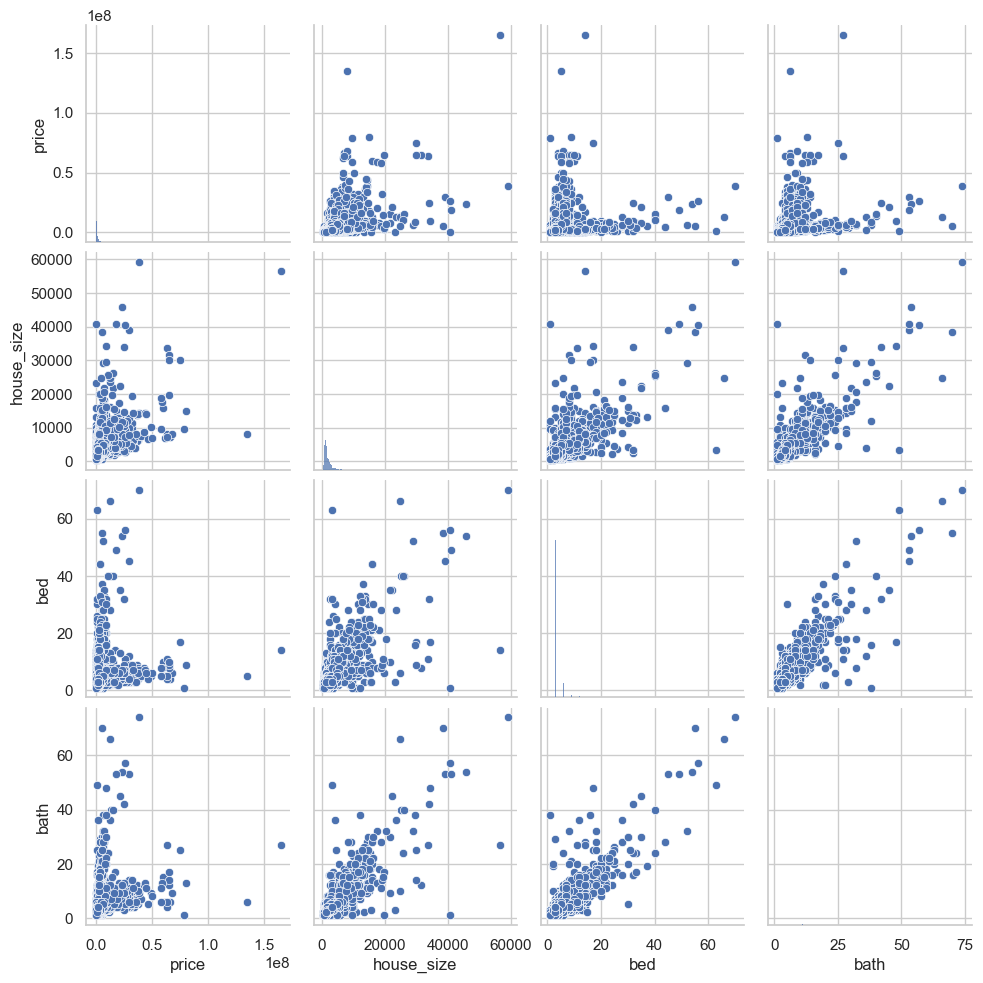

In [48]:
sns.pairplot(df[['price', 'house_size', 'bed', 'bath']]);

In [49]:
# Density Plot

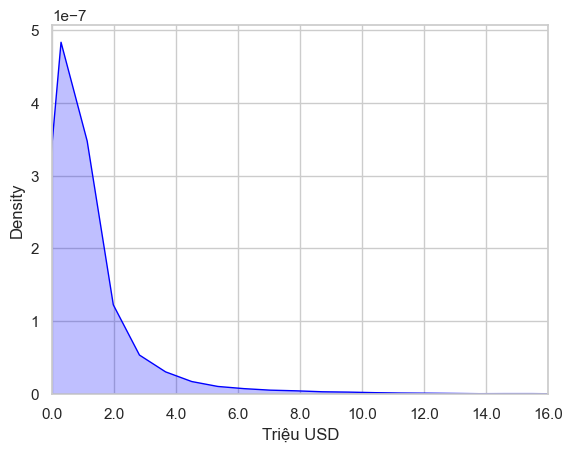

In [50]:
sns.kdeplot(df['price'], color='blue', fill=True)

plt.xlim(0, 15000000)
xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/((10**6)):,.1f}' for tick in xticks])

plt.xlabel('Triệu USD');

In [51]:
# Area Plot: Hiển thị xu hướng giá.

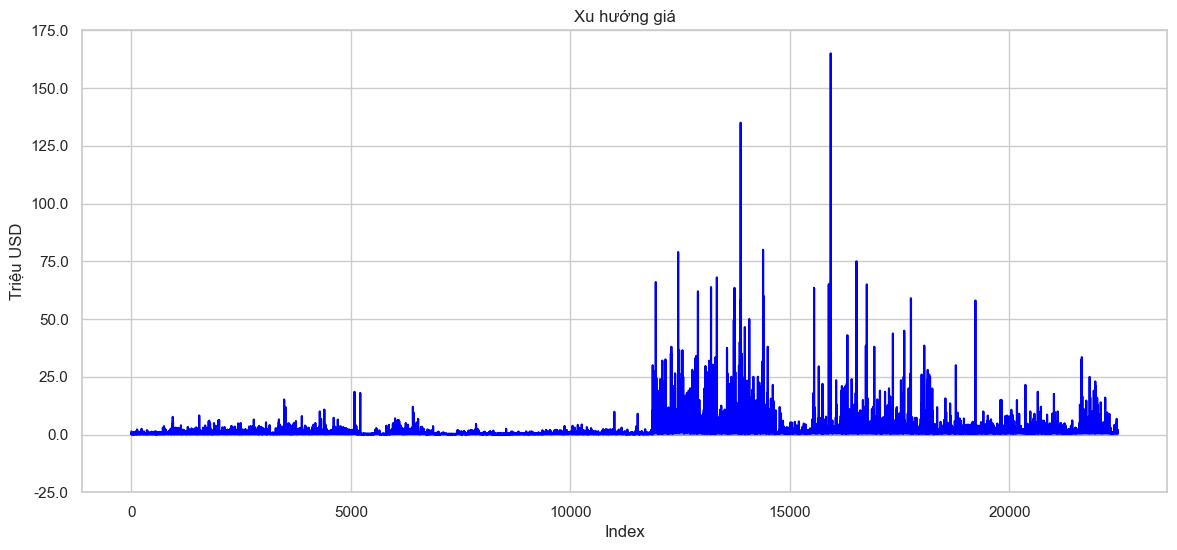

In [52]:
plt.figure(figsize=(14,6))

sns.lineplot(data=df['price'], color='blue')
plt.fill_between(df.index, df['price'], color='blue', alpha=0.3)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/((10**6)):,.1f}' for tick in yticks])

plt.title('Xu hướng giá')
plt.xlabel('Index')
plt.ylabel('Triệu USD');

In [53]:
# Biểu đồ bong bóng của giá bất động sản theo diện tích

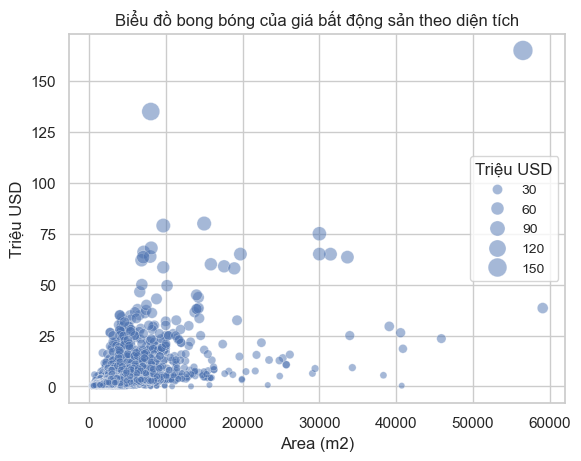

In [54]:
price_million = df['price'].apply(lambda x: x/(10**6))

sns.scatterplot(x=df.house_size, y=price_million, size=price_million, sizes=(20, 200), alpha=0.5)

plt.title('Biểu đồ bong bóng của giá bất động sản theo diện tích')
plt.xlabel('Area (m2)')
plt.ylabel('Triệu USD')

plt.legend(title='Triệu USD', fontsize='10');

# 6. Regression Analysis

In [55]:
# Huấn luyện mô hình
df['city_encoded'] = LabelEncoder().fit_transform(df['city'])
X = df[['house_size', 'bed', 'bath', 'city_encoded']]
Y = df[['price']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
price_predictions = model.predict(X_test)

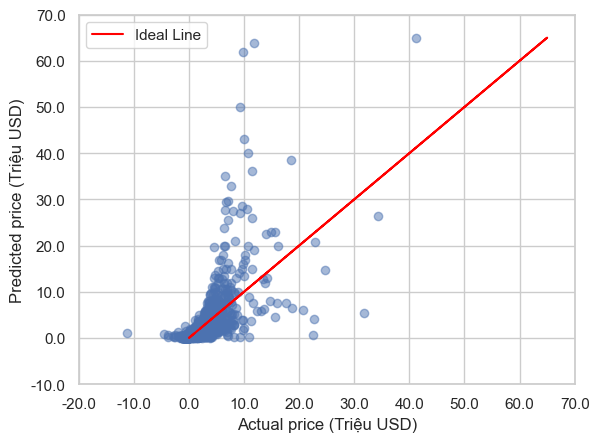

In [56]:
# Visualize khả năng dự đoán
plt.scatter(x=price_predictions, y=Y_test.values, alpha=0.5)
plt.plot(Y_test.values, Y_test.values, color='red', label='Ideal Line')

plt.ylabel('Predicted price (Triệu USD)')
plt.xlabel('Actual price (Triệu USD)')
plt.legend()

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/((10**6)):,.1f}' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/((10**6)):,.1f}' for tick in yticks]);

In [57]:
# Đánh giá hiệu suất model

In [58]:
mse = mean_squared_error(Y_test, price_predictions)
mae = mean_absolute_error(Y_test, price_predictions)
r2 = r2_score(Y_test, price_predictions)
intercept = model.intercept_  
coefficients = model.coef_   

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² score: {r2}")
print(f"Intercept (β0 - Hằng số): {intercept}")
print(f"Hệ số hồi quy (β1, β2, β3,...): {coefficients}")

Mean Squared Error (MSE): 5920400804728.887
Mean Absolute Error (MAE): 972646.3022461205
R² score: 0.4433923030117696
Intercept (β0 - Hằng số): [-860704.71746877]
Hệ số hồi quy (β1, β2, β3,...): [[   1496.39374902 -499242.71663412   19167.64029685 1361447.04324589]]


# 7. Hypothesis Testing 

In [59]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,price_range,city_encoded
0,10387.0,for_sale,1325000.0,5.0,6.0,0.18,1461359.0,Chicago,Illinois,60646.0,5100.0,2008-12-16,0-2M,0
1,29307.0,for_sale,374900.0,2.0,2.0,NaN,1423219.0,Chicago,Illinois,60660.0,1600.0,2016-04-14,0-2M,0
2,959.0,for_sale,154000.0,1.0,1.0,NaN,466047.0,Chicago,Illinois,60626.0,700.0,NaN,0-2M,0
3,92136.0,for_sale,329900.0,3.0,2.0,0.10,1299868.0,Chicago,Illinois,60630.0,967.0,NaN,0-2M,0
4,109914.0,for_sale,164900.0,2.0,1.0,NaN,1443877.0,Chicago,Illinois,60660.0,1000.0,2013-04-24,0-2M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22460,92883.0,sold,1650000.0,2.0,3.0,6.02,702209.0,Los Angeles,California,90049.0,2718.0,2021-11-24,0-2M,1
22461,60449.0,sold,1950000.0,4.0,3.0,0.30,686725.0,Los Angeles,California,90077.0,2299.0,2021-11-29,0-2M,1
22462,93060.0,sold,1979000.0,3.0,3.0,2.31,631616.0,Los Angeles,California,90077.0,2543.0,2021-12-01,0-2M,1
22463,22611.0,sold,749999.0,3.0,2.0,0.15,1537832.0,Los Angeles,California,91335.0,1456.0,2021-12-01,0-2M,1


#### Giả thuyết 1: Những căn nhà có nhiều phòng ngủ hơn (bed) sẽ có giá cao hơn (price)

Corr: 0.24657085903366044


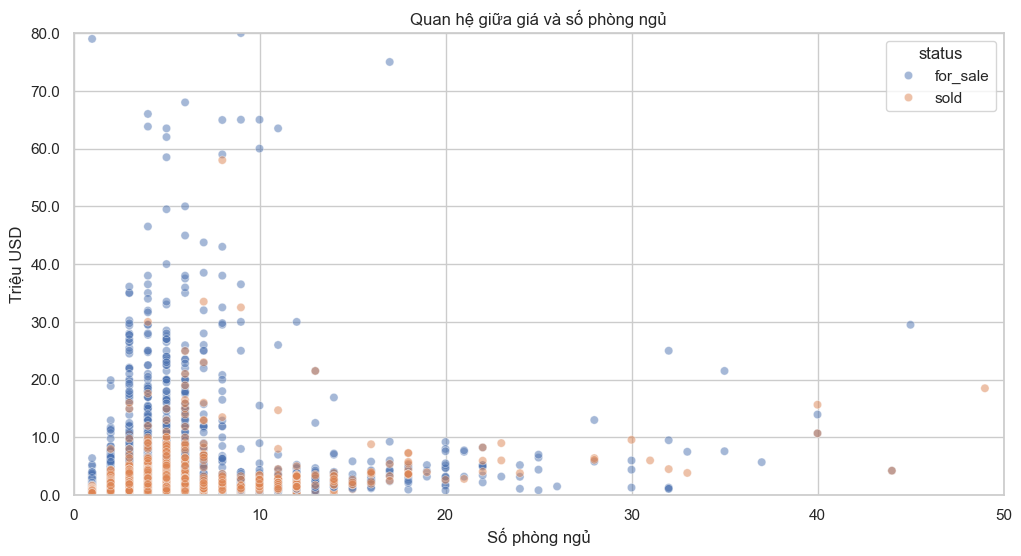

In [60]:
# Tính hệ số tương quan 
corr = df.bed.corr(df.price)
print(f'Corr: {corr}')

# Vẽ biểu đồ scatter
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bed', y='price', hue='status', data=df, alpha=0.5)

plt.xlim(0,50)
plt.ylim(0, 80000000)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10**6):,.1f}' for tick in yticks])

plt.title('Quan hệ giữa giá và số phòng ngủ')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Triệu USD');

Có một mối quan hệ dương yếu giữa số lượng phòng ngủ và giá của căn nhà, với hệ số tương quan là 0.257. Điều này cho thấy rằng căn nhà có nhiều phòng ngủ hơn có xu hướng có giá cao hơn, nhưng mối quan hệ này không mạnh mẽ.

#### Giả thuyết 2: Những căn nhà có nhiều phòng tắm hơn (bath) sẽ có giá cao hơn (price)

Corr: 0.41503037836855056


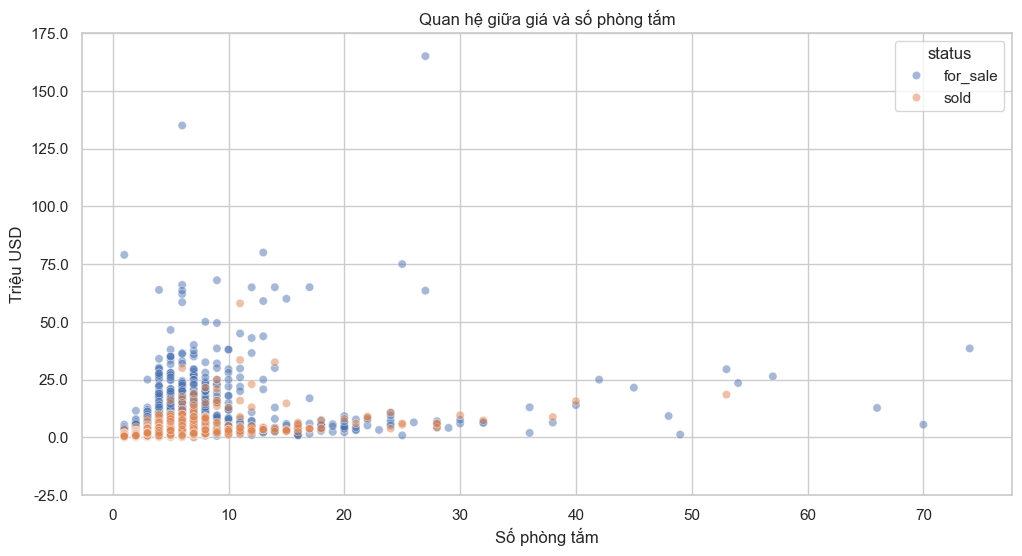

In [61]:
# Tính hệ số tương quan 
corr = df.bath.corr(df.price)
print(f'Corr: {corr}')

# Vẽ biểu đồ scatter
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bath', y='price', hue='status', data=df, alpha=0.5)


yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10**6):,.1f}' for tick in yticks])

plt.title('Quan hệ giữa giá và số phòng tắm')
plt.xlabel('Số phòng tắm')
plt.ylabel('Triệu USD');

Có một mối quan hệ dương trung bình giữa số lượng phòng ngủ và giá của căn nhà, với hệ số tương quan là 0.458. Điều này cho thấy rằng căn nhà có nhiều phòng ngủ hơn có xu hướng có giá cao hơn, và mối quan hệ này có độ mạnh đáng kể.

#### Giả thuyết 3: Diện tích nhà lớn hơn (house_size) sẽ dẫn đến giá nhà cao hơn (price).

Corr: 0.5689919386148315


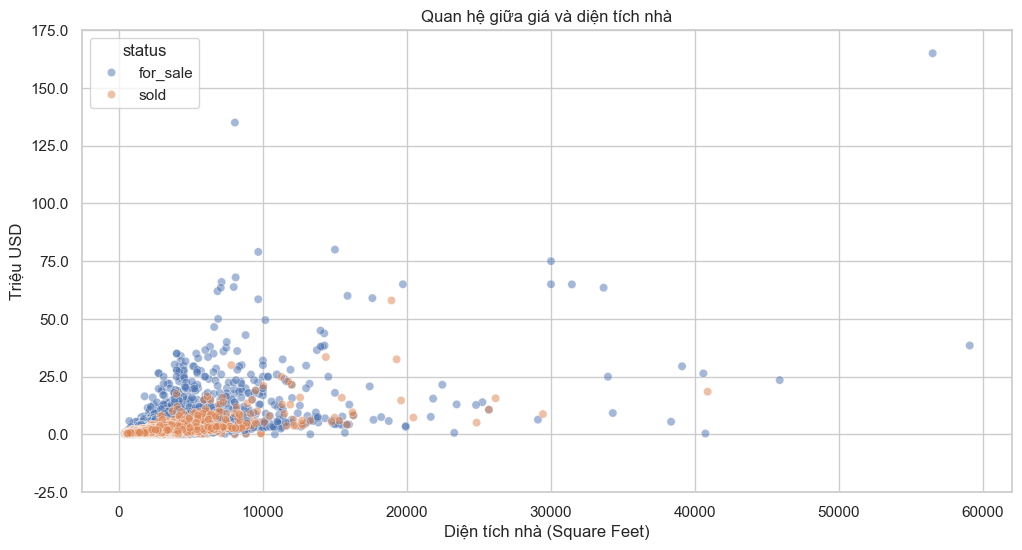

In [62]:
# Tính hệ số tương quan 
corr = df.house_size.corr(df.price)
print(f'Corr: {corr}')

# Vẽ biểu đồ scatter
plt.figure(figsize=(12, 6))
sns.scatterplot(x='house_size', y='price', hue='status',data=df, alpha=0.5)


yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10**6):,.1f}' for tick in yticks])

plt.title('Quan hệ giữa giá và diện tích nhà')
plt.xlabel('Diện tích nhà (Square Feet)')
plt.ylabel('Triệu USD');

Có một mối quan hệ dương mạnh giữa số lượng phòng ngủ và giá của căn nhà, với hệ số tương quan là 0.675. Điều này cho thấy rằng căn nhà có nhiều phòng ngủ hơn có xu hướng có giá cao hơn, và mối quan hệ này có ý nghĩa quan trọng trong việc định giá căn nhà.

####  Giả thuyết 4: Những thành phố khác nhau (state) có mức giá nhà trung bình khác nhau.


f_statistic: [1386.51797267]
p_value: [0.]



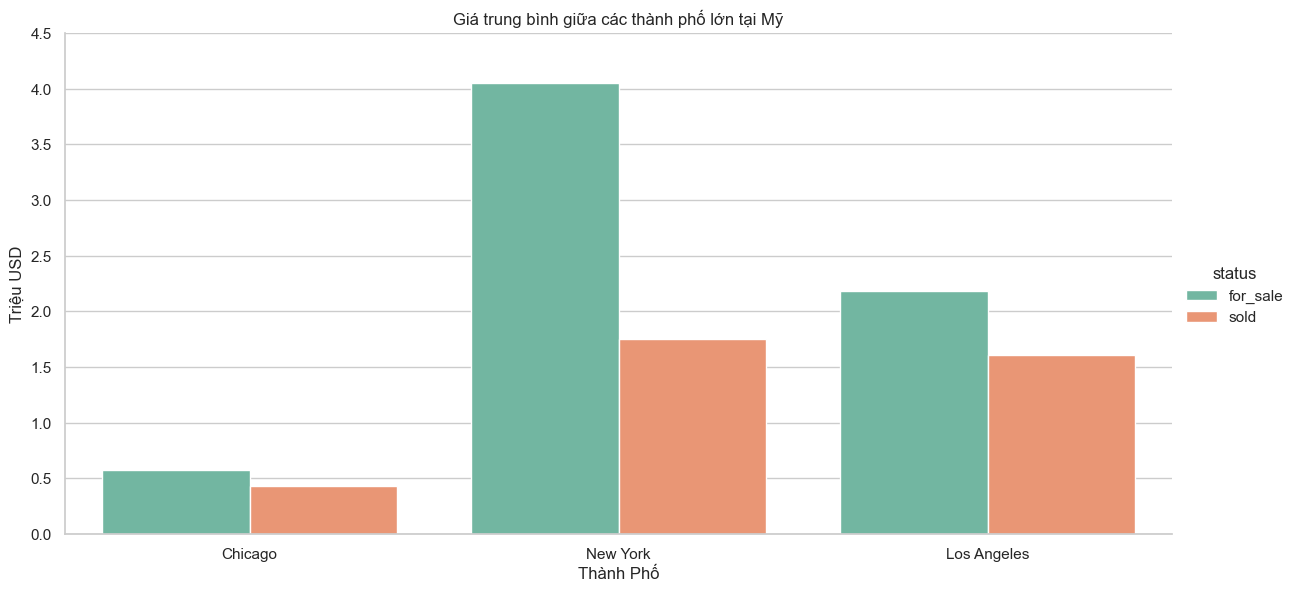

In [63]:
# Sử dụng kiểm định ANOVA
cities = df.city.unique()
group = [df[df['city'] == city][['price']].values for city in cities]
f_statistic, p_value = stats.f_oneway(*group)
print(f'''
f_statistic: {f_statistic}
p_value: {p_value}
''')

# Visualize bằng bar chart
sns.catplot(
    x="city", 
    y="price", 
    hue="status", 
    data=df, 
    kind="bar", 
    height=6, 
    aspect=2, 
    ci=None,
    palette="Set2"
)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/((10**6)):,.1f}' for tick in yticks])

plt.title('Giá trung bình giữa các thành phố lớn tại Mỹ')
plt.xlabel('Thành Phố')
plt.ylabel('Triệu USD');

Kết quả của kiểm định ANOVA cho thấy có sự khác biệt đáng kể trong mức giá nhà trung bình giữa các thành phố khác nhau, với F-statistic là 281.95 và p-value là 3.84 x 10^-120. Vì giá trị p rất nhỏ nên ta bác bỏ giả thuyết null và chấp nhận rằng ít nhất một thành phố có mức giá nhà trung bình khác biệt so với các thành phố khác.   

Bên cạnh đó biểu đồ cũng cho thấy sự khác biệt rõ rệt giữa giá nhà trung bình của 3 thành phố này, và những căn nhà có trạng thái for_sale thường có giá nhỉnh hơn đã được bán trước đó (đặc biệt là ở new yor, con số tăng hơn nhiều lần)


#### Giả thuyết 5: Những căn nhà ở các thành phố khác nhau (city) có diện tích trung bình khác nhau (house_size).


f_statistic: [303.98974297]
p_value: [5.42051815e-131]



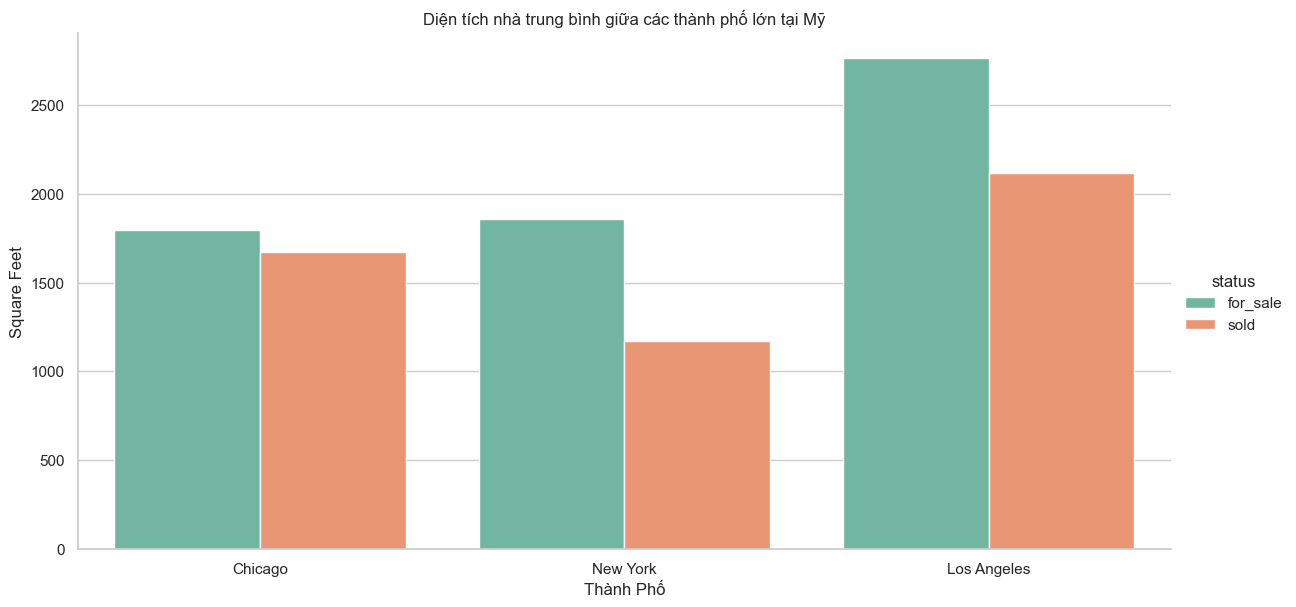

In [64]:
# Sử dụng kiểm định ANOVA
cities = df.city.unique()
group = [df[df['city'] == city][['house_size']].values for city in cities]
f_statistic, p_value = stats.f_oneway(*group)
print(f'''
f_statistic: {f_statistic}
p_value: {p_value}
''')

# Visualize bằng bar chart
sns.catplot(
    x="city", 
    y="house_size", 
    hue='status',
    data=df, 
    kind="bar", 
    height=6, 
    aspect=2, 
    color='Blue', 
    ci=None,
    palette="Set2"
)
plt.title('Diện tích nhà trung bình giữa các thành phố lớn tại Mỹ')
plt.xlabel('Thành Phố')
plt.ylabel('Square Feet');

Kết quả của kiểm định ANOVA cho thấy có sự khác biệt đáng kể trong diện tích trung bình của các căn nhà ở các bang khác nhau, với F-statistic là 31.81 và p-value là 1.68 x 10^-14.  

Từ biểu đồ này ta có thể thấy những căn nhà for_sale ở new york có diện tích gấp nhiều lần những căn đã được bán, và cũng có thể vì lý do này mà giá nhà ở newyork giữa hai loại status có độ chênh lệch cao như biểu đồ phía trước.


#### Giả thuyết 6: Số lượng trung bình của phòng ngủ và phòng tắm là bằng nhau.


t_value: [19.17716336]
p_value: [1.21891979e-81]



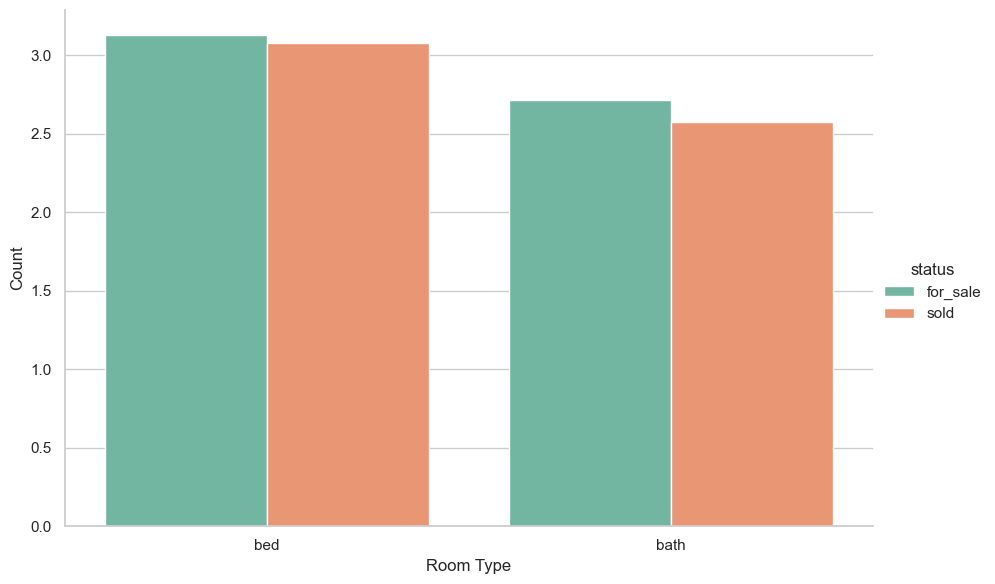

In [65]:
# Sử dụng kiểm định t-test
group = [df[['bed']].values, df[['bath']].values]
t_value, p_value = stats.ttest_ind(*group)
print(f'''
t_value: {t_value}
p_value: {p_value}
''')

# Visualize bằng bar chart
df_melted = pd.melt(df, id_vars=['status'], value_vars=['bed', 'bath'], 
                    var_name='Room Type', value_name='Count')

sns.catplot(
    x="Room Type", 
    y="Count", 
    hue="status", 
    data=df_melted, 
    kind="bar", 
    height=6, 
    aspect=1.5, 
    ci=None,
    palette="Set2"
);

Kết quả của kiểm định t-test cho thấy có sự khác biệt đáng kể giữa số lượng trung bình của phòng ngủ và phòng tắm, với t-value là 20.99 và p-value là 7.61 x 10^-97. Vì giá trị p rất nhỏ nên ta bác bỏ giả thuyết null và kết luận rằng số lượng trung bình của phòng ngủ và phòng tắm có sự khác biệt.

# 8. Map

In [66]:
import geopandas as gpd
from matplotlib.ticker import FuncFormatter

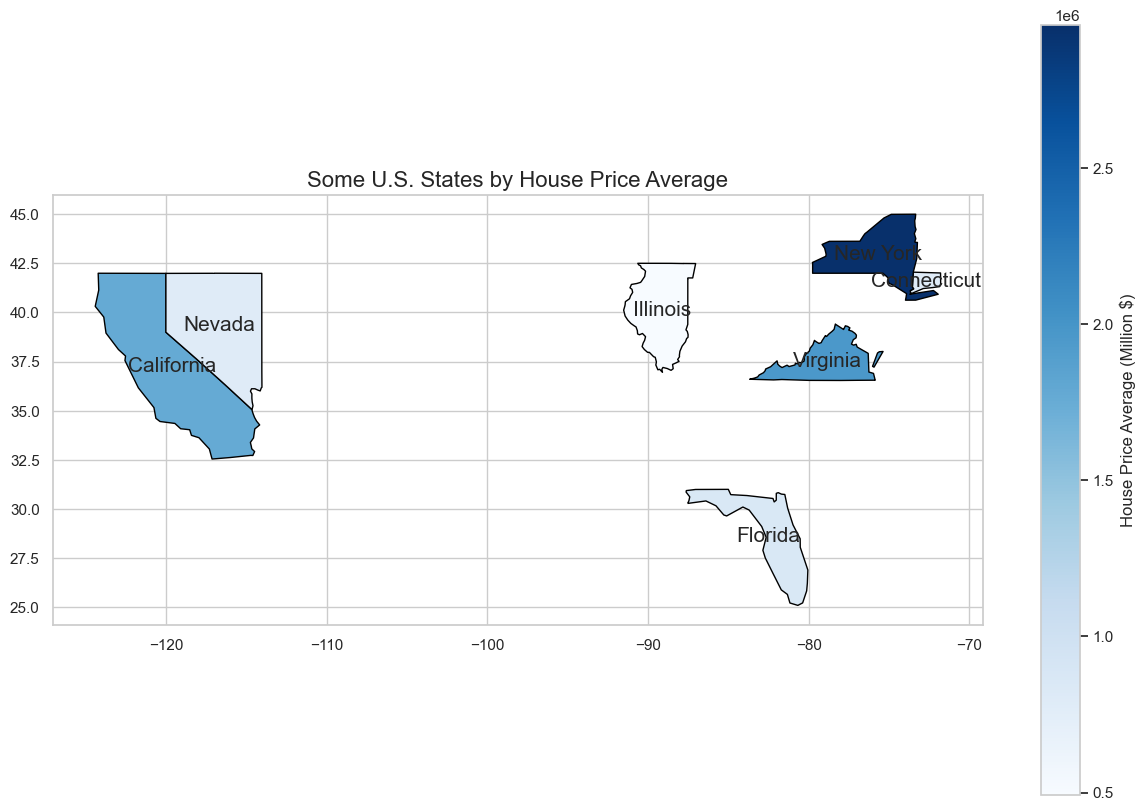

In [67]:
# 1. Đọc dữ liệu shapefile của các bang Mỹ
usa_states = gpd.read_file(r"C:\Users\LAILE\OneDrive\Máy tính\ADY201m\PythonProject_OnCourse\LAB\LAB3\America\DataSet\ne_110m_admin_1_states_provinces\ne_110m_admin_1_states_provinces.shp")  

# 2. Tạo dataframe
price_df = df_all.groupby('state').agg({'price': 'mean'}).reset_index()

# 3. Kết hợp dữ liệu dân số với dữ liệu hình dạng các bang
usa_states = usa_states.merge(price_df, left_on="name", right_on="state", how='inner')

# 4. Vẽ bản đồ
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Sử dụng cột 'density' để điều chỉnh độ đậm nhạt của màu sắc, sử dụng missing_kwds nếu muốn vẽ những bang khác
cmap = usa_states.plot(column='price', ax=ax, legend=True,
                legend_kwds={'label': "House Price Average (Million $)",
                             'orientation': "vertical"},
                cmap='Blues', edgecolor='black'
                )

# Thêm tên các bang
for x, y, label in zip(usa_states.geometry.centroid.x, usa_states.geometry.centroid.y, usa_states['state']):
    ax.text(x, y, label, fontsize=15, ha='center', va='center')

plt.title("Some U.S. States by House Price Average", fontsize=16);